In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd 
import numpy as np
import statsmodels.api as sm

# 데이터 불러오기
data = pd.read_csv('/content/drive/MyDrive/공모전/데이터/학습용/데이터변환2.csv')

# crim, rm, lstat을 통한 다중 선형회귀분석
x_data = data[["시간","교통량","요일", "방향",	"거리",	"차선수",	"기능유형구분",	"합류도로수",	"제한속도",	"주말 유무"]] #변수 여러개
x_data.astype('float64')
target = data[["속도"]]

# for b0, 상수항 추가
x_data1 = sm.add_constant(x_data, has_constant = "add")

# OLS 검정
multi_model = sm.OLS(target, x_data1)
fitted_multi_model = multi_model.fit()
fitted_multi_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     속도   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                 1.561e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        11:27:29   Log-Likelihood:            -2.7367e+05
No. Observations:               73872   AIC:                         5.474e+05
Df Residuals:                   73861   BIC:                         5.475e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -495.2522      3.999   -123.843      0.000    -503.090    -487.414
시간            -0.2279      0.006    -40.944      0.000      -0.239      -0.217
교통량           -0.0075   4.65e-05   -161.204      0.000      -0.008      -0.007
요일             0.0180      0.022      0.820      0.412      -0.025       0.061
방향             0.4623      0.085      5.420      0.000       0.295       0.630
거리             0.0318      0.001     63.049      0.000       0.031       0.033
차선수            7.2869      0.092     78.903      0.000       7.106       7.468
기능유형구분      -160.0055      1.371   -116.718      0.000    -162.692    -157.319
합류도로수        -34.5098      0.290   -118.912      0.000     -35.079     -33.941
제한속도           9.4779      0.070    135.583      0.000       9.341       9.615
주말 유무          1.3442      0.118     11.427      0.000       1.114       1.575
==============================================================================
Omnibus:                     9105.730   Durbin-Watson:                   0.486
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            36223.124
Skew:                          -0.574   Prob(JB):                         0.00
Kurtosis:                       6.233   Cond. No.                     2.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 변수 다중회귀모델의 계수

fitted_multi_model.params

const    -495.252187
시간         -0.227885
교통량        -0.007489
요일          0.017989
방향          0.462328
거리          0.031750
차선수         7.286865
기능유형구분   -160.005525
합류도로수     -34.509841
제한속도        9.477858
주말 유무       1.344155
dtype: float64

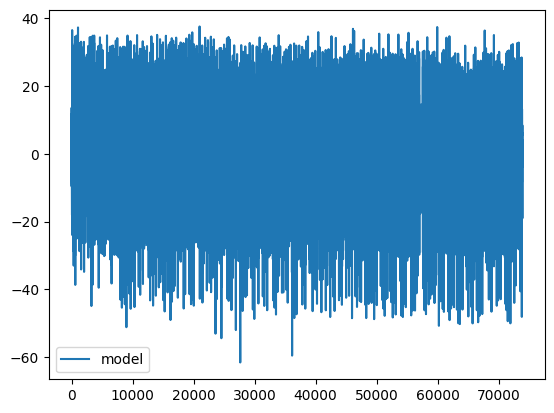

In [ ]:
# 3개 모델과 full모델의 잔차비교

import matplotlib.pyplot as plt
fitted_multi_model.resid.plot(label = "model")
fitted_multi_model2.resid.plot(label = "full model")
plt.legend()

In [ ]:
# 상관행렬 보기
x_data.corr()


,시간,교통량,요일,방향,거리,차선수,기능유형구분,합류도로수,제한속도,주말 유무
시간,1.000000e+00,0.298874,-2.297693e-17,-3.437694e-17,3.977720e-17,8.344082e-17,-2.179163e-17,-1.545151e-17,-2.316662e-17,-7.587146e-16
교통량,2.988735e-01,1.000000,-7.695668e-02,7.789775e-02,1.439919e-01,1.377019e-01,4.339262e-01,2.863201e-01,4.409560e-01,-8.557921e-02
요일,-2.297693e-17,-0.076957,1.000000e+00,2.172227e-03,-3.349251e-03,-6.879765e-04,5.095360e-04,3.381441e-03,1.918301e-03,5.583678e-01
방향,-3.437694e-17,0.077898,2.172227e-03,1.000000e+00,-2.607269e-01,-1.925738e-01,7.223628e-03,-1.158844e-01,3.234596e-03,5.489047e-03
거리,3.977720e-17,0.143992,-3.349251e-03,-2.607269e-01,1.000000e+00,-2.605304e-01,4.091655e-01,-1.083722e-01,1.728682e-01,-4.959997e-03
차선수,8.344082e-17,0.137702,-6.879765e-04,-1.925738e-01,-2.605304e-01,1.000000e+00,-8.882783e-02,4.778500e-01,1.565707e-01,4.396274e-03
기능유형구분,-2.179163e-17,0.433926,5.095360e-04,7.223628e-03,4.091655e-01,-8.882783e-02,1.000000e+00,4.494445e-01,9.187608e-01,-3.301961e-03
합류도로수,-1.545151e-17,0.286320,3.381441e-03,-1.158844e-01,-1.083722e-01,4.778500e-01,4.494445e-01,1.000000e+00,7.517891e-01,4.414705e-03
제한속도,-2.316662e-17,0.440956,1.918301e-03,3.234596e-03,1.728682e-01,1.565707e-01,9.187608e-01,7.517891e-01,1.000000e+00,-3.202100e-04
주말 유무,-7.587146e-16,-0.085579,5.583678e-01,5.489047e-03,-4.959997e-03,4.396274e-03,-3.301961e-03,4.414705e-03,-3.202100e-04,1.000000e+00


/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seaborn/utils.py:80: UserWarning: Glyph 50836 (\N{HANGUL SYLLABLE YO}) missing from current font.
  fig.canvas.draw()
/usr/local/lib/python3.10/dist-packages/seabo

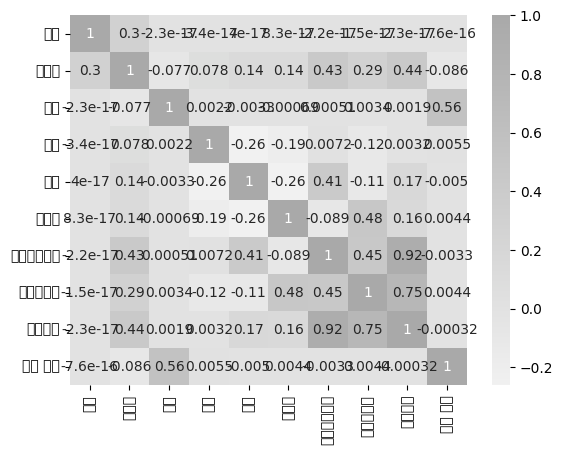

In [ ]:
# 상관행렬 시각화
import seaborn as sns                        #heatmap 만들기 위한 라이브러리
cmap = sns.light_palette("darkgray", as_cmap = True)  
sns.heatmap(x_data.corr(), annot = True, cmap = cmap)
plt.show()

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 44368 (\N{HANGUL SYLLABLE GYO}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 53685 (\N{HANGUL SYLLABLE TONG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:118: UserWarning: Glyph 47049 (\N{HANGUL SYLLABLE RYANG}) missing from current font.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.p

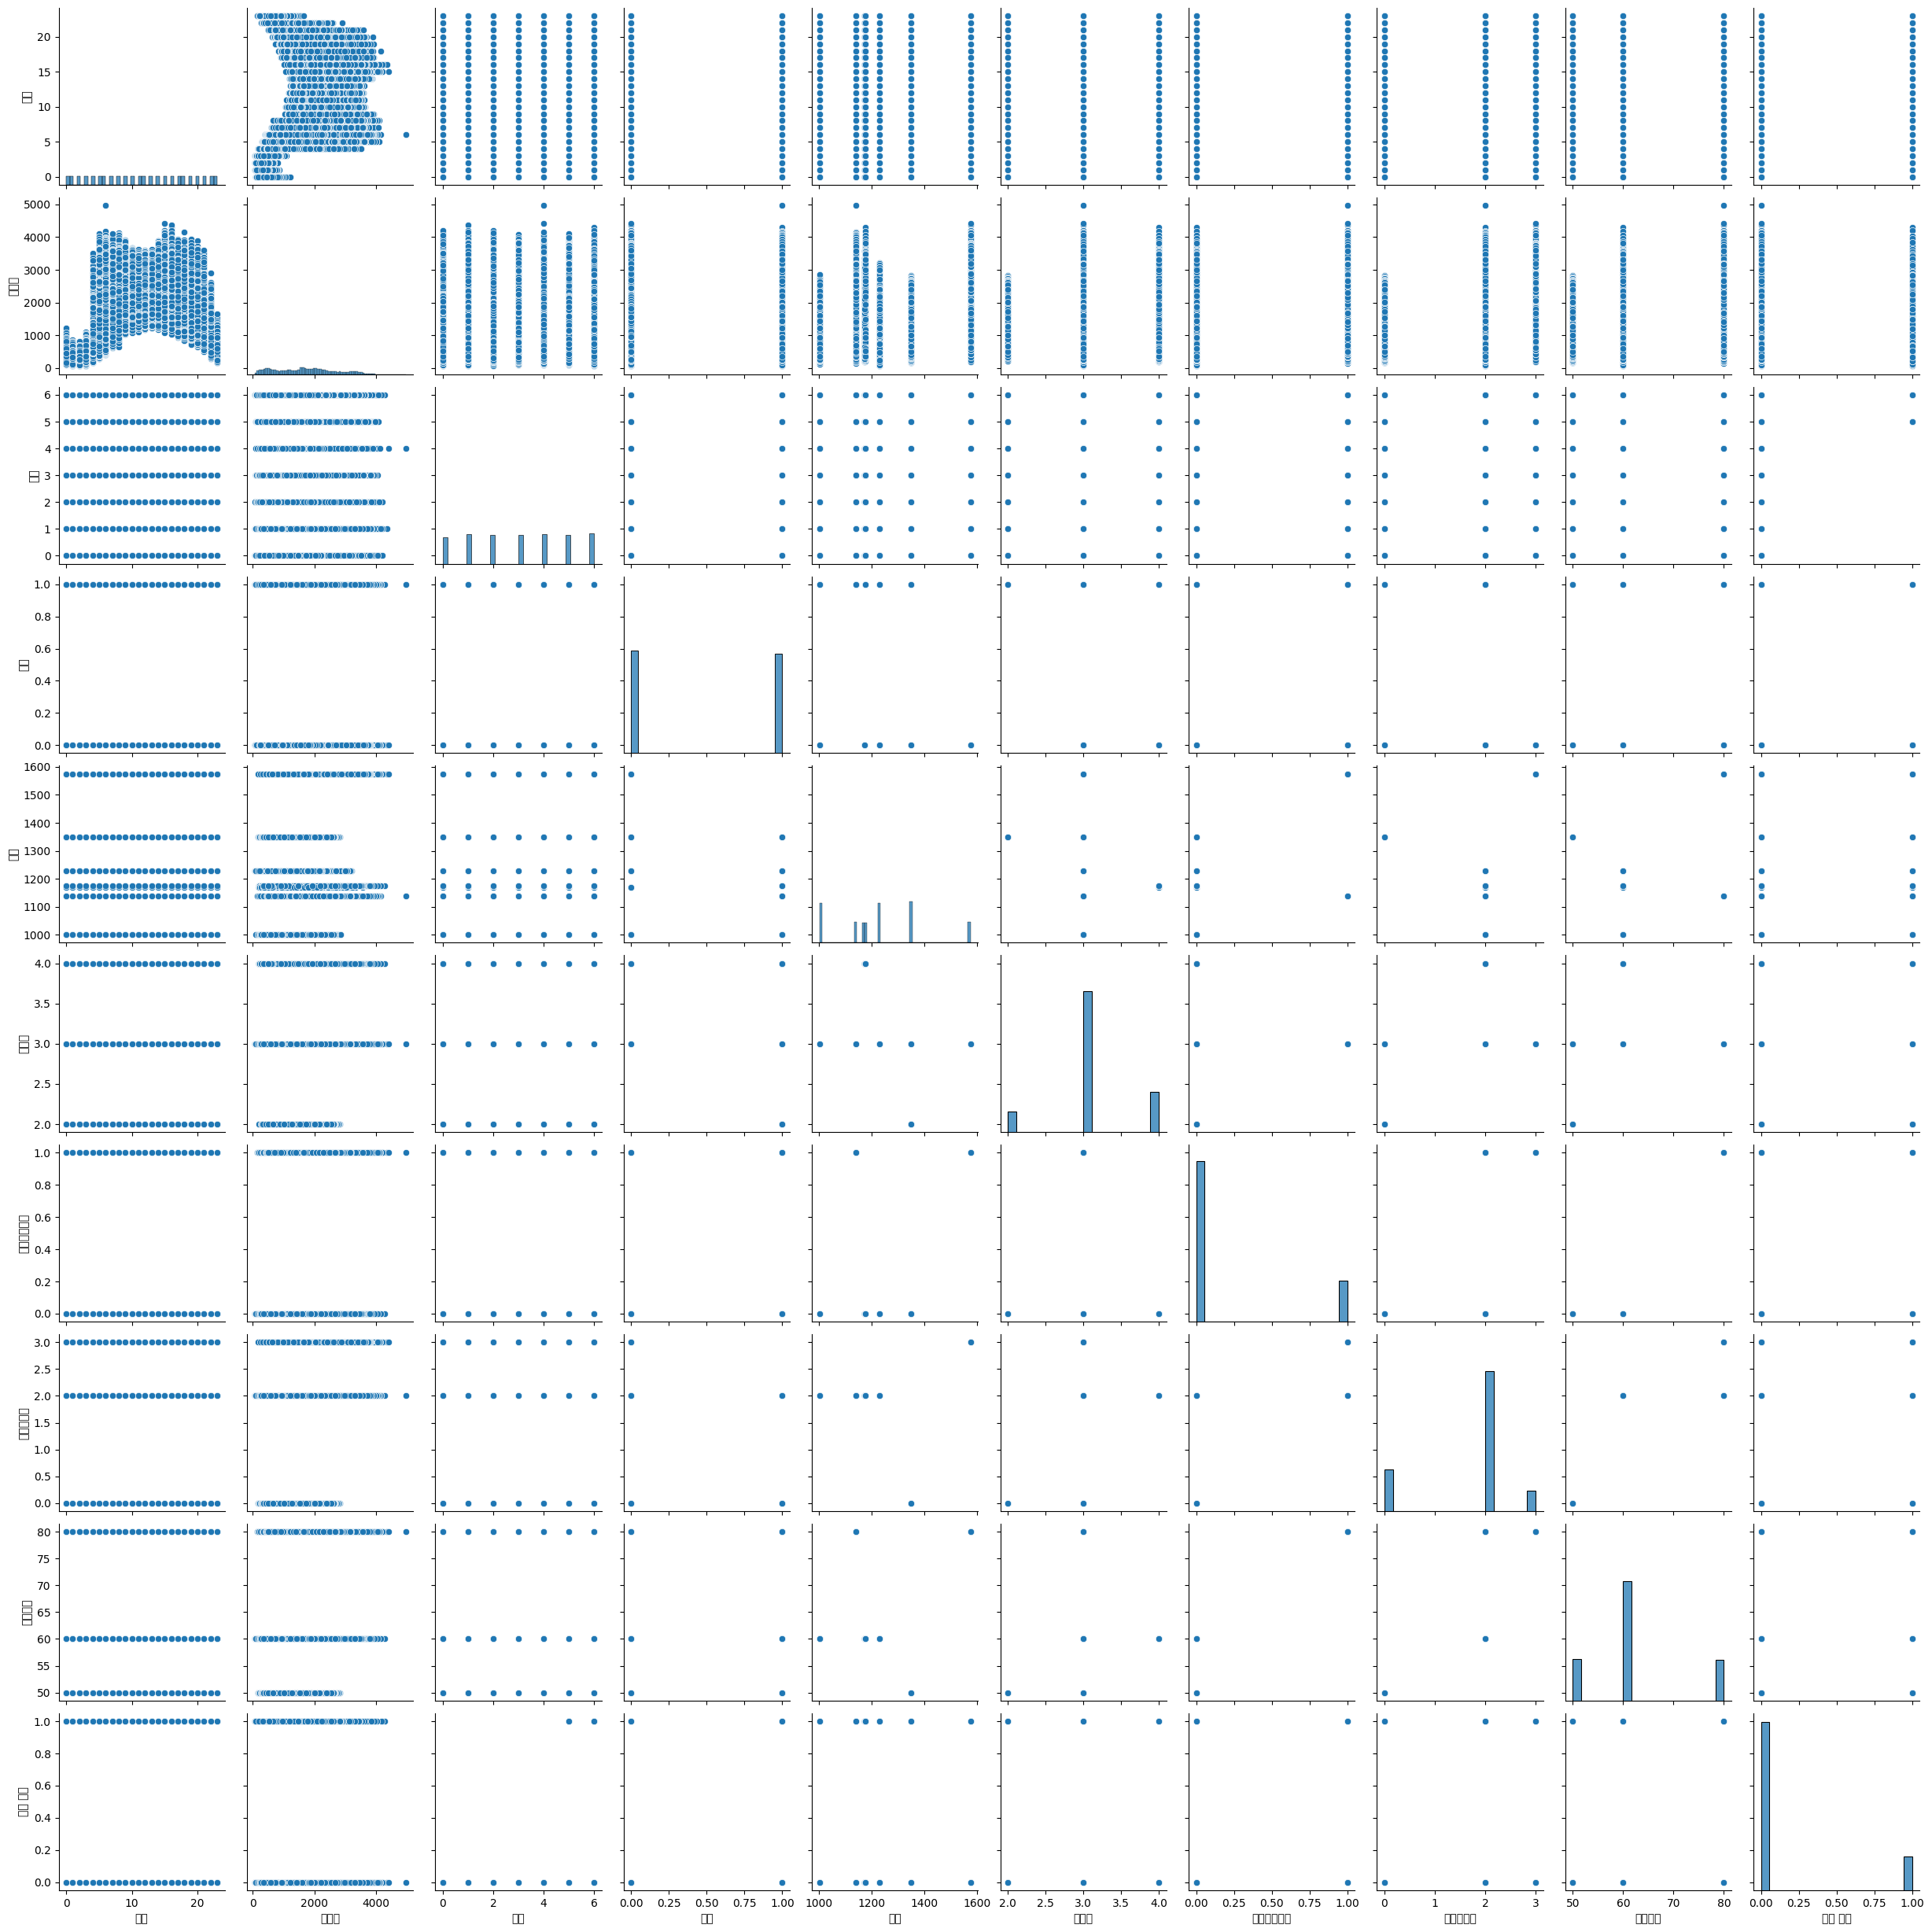

In [ ]:
# 변수끼리 산점도를 시각화
sns.pairplot(x_data)
plt.show()

In [ ]:
! pip install statsmodels

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# VIF사용을 위한 라이브러리, statsmodels안에 존재한다.
# 사실 모든 통계기법이 statsmodels 모듈에 존재하여 
# 이 중에 필요한 통계기법을 찾아 import를 진행하면 된다.

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(x_data.values, i) for i in range(x_data.shape[1])]
vif["features"] = x_data.columns
vif

,VIF Factor,features
0,4.263589,시간
1,6.234434,교통량
2,4.880617,요일
3,2.531606,방향
4,66.419140,거리
5,58.302787,차선수
6,5.139195,기능유형구분
7,13.850072,합류도로수
8,208.851144,제한속도
9,1.747934,주말 유무


In [ ]:
# nox 변수 제거 후 vif 확인

vif = pd.DataFrame()
x_data3 = x_data.drop("제한속도",axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data3.values, i) for i in range(x_data3.shape[1])]
vif["features"] = x_data3.columns
vif

,VIF Factor,features
0,4.178910,시간
1,6.205839,교통량
2,4.812038,요일
3,1.902203,방향
4,25.663213,거리
5,38.468647,차선수
6,2.603657,기능유형구분
7,9.147441,합류도로수
8,1.744147,주말 유무


In [ ]:
vif = pd.DataFrame()
x_data4 = x_data3.drop("방향", axis=1)
x_data4 = x_data3.drop("기능유형구분", axis=1)
x_data4 = x_data3.drop("거리", axis=1)
vif["VIF Factor"] = [variance_inflation_factor(x_data4.values, i) for i in range(x_data4.shape[1])]
vif["features"] = x_data4.columns
vif

,VIF Factor,features
0,4.034170,시간
1,6.203820,교통량
2,4.633384,요일
3,1.899211,방향
4,14.153801,차선수
5,2.080471,기능유형구분
6,7.834602,합류도로수
7,1.737336,주말 유무


In [ ]:
# nox 변수를 제거한 x_data3 상수항 추가 후 회귀모델 적합시키기
# nox, rm 변수를 제거한 x_data4 상수항 추가 후 회귀모델 적합시키기

x_data3_ = sm.add_constant(x_data3, has_constant = "add")
x_data4_ = sm.add_constant(x_data4, has_constant = "add")

model_vif = sm.OLS(target, x_data3)
fitted_model_vif = model_vif.fit()

model_vif2 = sm.OLS(target,x_data4_)
fitted_model_vif2 = model_vif2.fit()

# 두 vif를 통한 변수제거 회귀모델의 결과를 비교

fitted_model_vif.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                     속도   R-squared (uncentered):                   0.950
Model:                            OLS   Adj. R-squared (uncentered):              0.950
Method:                 Least Squares   F-statistic:                          1.557e+05
Date:                Mon, 01 May 2023   Prob (F-statistic):                        0.00
Time:                        11:45:19   Log-Likelihood:                     -2.8502e+05
No. Observations:               73872   AIC:                                  5.701e+05
Df Residuals:                   73863   BIC:                                  5.701e+05
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
시간            -0.1489      0.006    -23.173      0.000      -0.161      -0.136
교통량           -0.0080    5.4e-05   -147.299      0.000      -0.008      -0.008
요일             0.2468      0.025      9.716      0.000       0.197       0.297
방향             7.7043      0.083     92.958      0.000       7.542       7.867
거리            -0.0033      0.000    -19.291      0.000      -0.004      -0.003
차선수           16.2167      0.083    194.707      0.000      16.053      16.380
기능유형구분        21.8029      0.151    144.445      0.000      21.507      22.099
합류도로수          4.6963      0.066     70.664      0.000       4.566       4.827
주말 유무          0.8130      0.137      5.934      0.000       0.545       1.082
==============================================================================
Omnibus:                     9251.437   Durbin-Watson:                   0.355
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17712.951
Skew:                          -0.809   Prob(JB):                         0.00
Kurtosis:                       4.772   Cond. No.                     8.83e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.83e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
fitted_model_vif2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     속도   R-squared:                       0.565
Model:                            OLS   Adj. R-squared:                  0.565
Method:                 Least Squares   F-statistic:                 1.198e+04
Date:                Mon, 01 May 2023   Prob (F-statistic):               0.00
Time:                        11:45:23   Log-Likelihood:            -2.8490e+05
No. Observations:               73872   AIC:                         5.698e+05
Df Residuals:                   73863   BIC:                         5.699e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.2211      0.293     24.647      0.000       6.647       7.795
시간            -0.2088      0.006    -32.234      0.000      -0.221      -0.196
교통량           -0.0080   5.39e-05   -147.416      0.000      -0.008      -0.008
요일             0.0103      0.026      0.403      0.687      -0.040       0.060
방향             6.9992      0.087     80.744      0.000       6.829       7.169
차선수           12.8349      0.099    129.421      0.000      12.640      13.029
기능유형구분        19.6146      0.139    140.711      0.000      19.341      19.888
합류도로수          5.6014      0.064     87.903      0.000       5.476       5.726
주말 유무          1.2402      0.137      9.057      0.000       0.972       1.509
==============================================================================
Omnibus:                    11094.024   Durbin-Watson:                   0.354
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            23676.677
Skew:                          -0.903   Prob(JB):                         0.00
Kurtosis:                       5.105   Cond. No.                     1.43e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.43e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# 학습 검증데이터 분할
from sklearn.model_selection import train_test_split

X = x_data3_
y = target

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(51710, 10) (22162, 10) (51710, 1) (22162, 1)


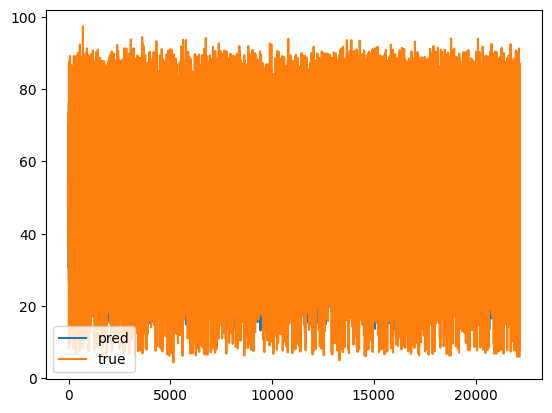

In [ ]:
# train_x에 상수항 추가 후 최귀모델 적합

fit_train1 = sm.OLS(train_y,train_x)
fit_train1 = fit_train1.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train1.predict(test_x)),label = "pred")
plt.plot(np.array(test_y),label = "true")
plt.legend()
plt.show()

In [ ]:
X = x_data4_
y = target

train_x1, test_x1, train_y1, test_y1 = train_test_split(X,y, train_size = 0.7, test_size = 0.3, random_state = 1)
# 학습데이터와 검증데이터를 7:3으로 분리한다.
# random_state고정을 통해 그때마다 똑같은 값을 분류하도록 한다.

print(train_x1.shape, test_x1.shape, train_y1.shape, test_y1.shape)

(51710, 9) (22162, 9) (51710, 1) (22162, 1)


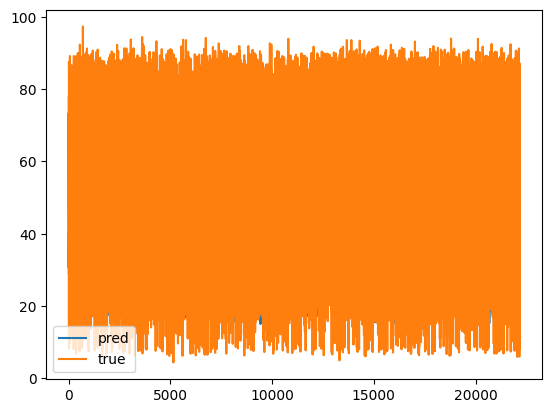

In [ ]:
# train_x에 상수항 추가 후 최귀모델 적합

fit_train2 = sm.OLS(train_y1,train_x1)
fit_train2 = fit_train2.fit()

# 검증데이터에 대한 예측값과 true값 비교

plt.plot(np.array(fit_train2.predict(test_x1)),label = "pred")
plt.plot(np.array(test_y1),label = "true")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

#변수 제거가 이루어지지 않은 full모델
mse1 = mean_squared_error(y_true = test_y["속도"], y_pred = fit_train1.predict(test_x))
#변수 제거 모델
mse2 = mean_squared_error(y_true = test_y1["속도"], y_pred = fit_train2.predict(test_x1))

print(mse1)
print(mse2)

121.5052652575568
132.41868067686144
